In [7]:
import pandas as pd
import numpy as np
import os
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
title = pd.read_csv('mergeddata.csv')

C:\Users\Rutwik\AppData\Local\Temp\ipykernel_1388\3112842767.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  title = pd.read_csv('mergeddata.csv')


In [8]:
df = title.drop(['Unnamed: 0.1','Unnamed: 0','genres','tags','specs','price','metascore', 'url','release_date','discount_price', 'reviews_url','early_access','developer','app_name','publisher'],axis=1)

In [9]:
df

,uid,id,owned,title,sentiment
0,0,10,1.0,Counter-Strike,Overwhelmingly Positive
1,1,10,1.0,Counter-Strike,Overwhelmingly Positive
2,3,10,1.0,Counter-Strike,Overwhelmingly Positive
3,4,10,1.0,Counter-Strike,Overwhelmingly Positive
4,10,10,1.0,Counter-Strike,Overwhelmingly Positive
...,...,...,...,...,...
4222467,67381,444770,1.0,Mimpi Dreams,Very Positive
4222468,74089,375450,1.0,NOBUNAGA'S AMBITION: Sphere of Influence - Asc...,Mixed
4222469,85030,353390,1.0,Alienware Steam Machine,8 user reviews
4222470,86026,354280,1.0,ChaosTower,9 user reviews


In [10]:
# Define the sentiment labels to keep
valid_sentiments = ['Overwhelmingly Positive', 'Very Positive', 'Mostly Positive', 'Mixed',
                    'Mostly Negative', 'Overwhelmingly Negative', 'Positive', 'Negative', 'Very Negative']

# Keep rows with valid sentiment labels
df_final = df[df['sentiment'].isin(valid_sentiments)]

# Print the updated DataFrame
print(df_final)


           uid      id  owned  \
0            0      10    1.0   
1            1      10    1.0   
2            3      10    1.0   
3            4      10    1.0   
4           10      10    1.0   
...        ...     ...    ...   
4222465  55137  433400    1.0   
4222466  58395  456780    1.0   
4222467  67381  444770    1.0   
4222468  74089  375450    1.0   
4222471  86588  433920    1.0   

                                                     title  \
0                                           Counter-Strike   
1                                           Counter-Strike   
2                                           Counter-Strike   
3                                           Counter-Strike   
4                                           Counter-Strike   
...                                                    ...   
4222465                                                Kim   
4222466                          DUCATI - 90th Anniversary   
4222467                                      

In [11]:
sentiment_mapping = {
    'Overwhelmingly Positive': 5,
    'Very Positive': 4,
    'Mostly Positive': 3,
    'Mixed': 2,
    'Mostly Negative': 1,
    'Overwhelmingly Negative': 0,
    'Positive': 3, 
    'Negative': 1, 
    'Very Negative': 0  
}
df_final['rating'] = df_final['sentiment'].map(sentiment_mapping)


C:\Users\Rutwik\AppData\Local\Temp\ipykernel_1388\2904716108.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['rating'] = df_final['sentiment'].map(sentiment_mapping)


In [12]:
df_final = df_final.drop(['sentiment'],axis=1)

In [13]:
df_final.to_csv('final_data.csv')

In [8]:
df = pd.read_csv('final_data.csv')

In [3]:
df

,Unnamed: 0,uid,id,owned,genres,title,specs,rating
0,0,0,10,1.0,['Action'],Counter-Strike,"['Multi-player', 'Valve Anti-Cheat enabled']",5
1,1,1,10,1.0,['Action'],Counter-Strike,"['Multi-player', 'Valve Anti-Cheat enabled']",5
2,2,3,10,1.0,['Action'],Counter-Strike,"['Multi-player', 'Valve Anti-Cheat enabled']",5
3,3,4,10,1.0,['Action'],Counter-Strike,"['Multi-player', 'Valve Anti-Cheat enabled']",5
4,4,10,10,1.0,['Action'],Counter-Strike,"['Multi-player', 'Valve Anti-Cheat enabled']",5
...,...,...,...,...,...,...,...,...
4197322,4222465,55137,433400,1.0,"['Adventure', 'Indie', 'RPG']",Kim,"['Single-player', 'Steam Achievements', 'Steam...",3
4197323,4222466,58395,456780,1.0,"['Racing', 'Simulation', 'Sports']",DUCATI - 90th Anniversary,"['Single-player', 'Multi-player', 'Steam Achie...",2
4197324,4222467,67381,444770,1.0,"['Adventure', 'Indie']",Mimpi Dreams,"['Single-player', 'Steam Achievements', 'Full ...",4
4197325,4222468,74089,375450,1.0,['Strategy'],NOBUNAGA'S AMBITION: Sphere of Influence - Asc...,"['Single-player', 'Steam Achievements', 'Steam...",2


In [31]:
data = gamesdata[gamesdata['release_date'].notnull()]

In [32]:
# Replace strings which are not of the format xxxx-xx-xx with None
data['release_date'] = data['release_date'].map(lambda x : x if x[-3] == '-'else None)

# Select entries where release date is not null
data = data[data['release_date'].notnull()]

# Convert to DateTime 
data['release_date'] = pd.to_datetime(data['release_date'])

# Check 
data['release_date'].describe()

C:\Users\Rutwik\AppData\Local\Temp\ipykernel_25608\1922077330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['release_date'] = data['release_date'].map(lambda x : x if x[-3] == '-'else None)
C:\Users\Rutwik\AppData\Local\Temp\ipykernel_25608\1922077330.py:11: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['release_date'].describe()


count                   29783
unique                   3457
top       2012-10-16 00:00:00
freq                      100
first     1970-07-15 00:00:00
last      2021-12-31 00:00:00
Name: release_date, dtype: object

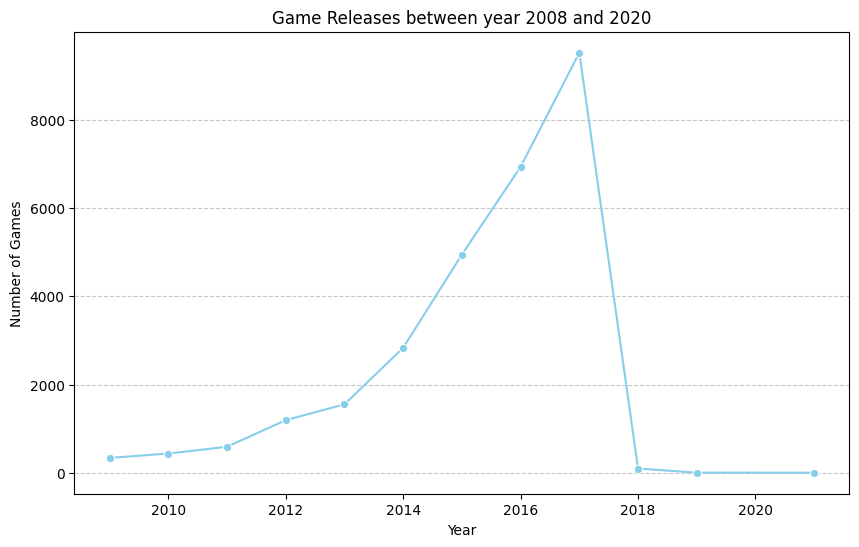

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame of recent games is named 'recentgames'

# Group the data by year and count the number of games released in each year
game_counts_by_year = recentgames['release_date'].dt.year.value_counts().sort_index()

# Increase the size of the plot
plt.figure(figsize=(10, 6))

# Create a line plot
sns.lineplot(x=game_counts_by_year.index, y=game_counts_by_year.values, marker='o', color='skyblue')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set plot title and labels
plt.title('Game Releases between year 2008 and 2020')
plt.ylabel('Number of Games')
plt.xlabel('Year')

plt.show()


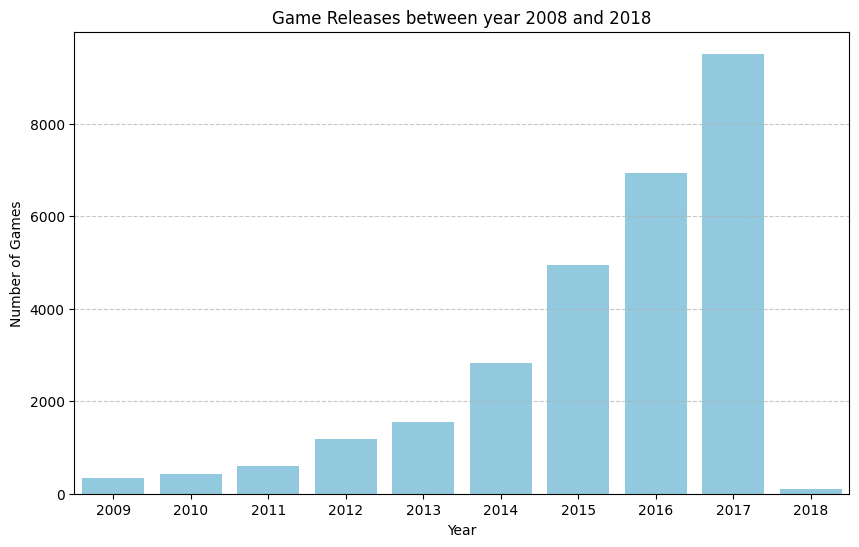

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame of recent games is named 'recentgames'

# Filter the DataFrame to include only data between 2008 and 2018
recentgames_filtered = recentgames[(recentgames['release_date'].dt.year >= 2008) & (recentgames['release_date'].dt.year <= 2018)]

# Sort the filtered DataFrame by 'release_date' column
recentgames_sorted = recentgames_filtered.sort_values(by='release_date')

# Get the unique years in the filtered DataFrame
years = recentgames_sorted['release_date'].dt.year.unique()

# Increase the size of the plot
plt.figure(figsize=(10, 6))

# Create the bar graph using countplot and specify the order of x-axis labels
sns.countplot(x=recentgames_sorted['release_date'].dt.year,
              order=years, color='skyblue')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set plot title and labels
plt.title('Game Releases between year 2008 and 2018')
plt.ylabel('Number of Games')
plt.xlabel('Year')


plt.show()


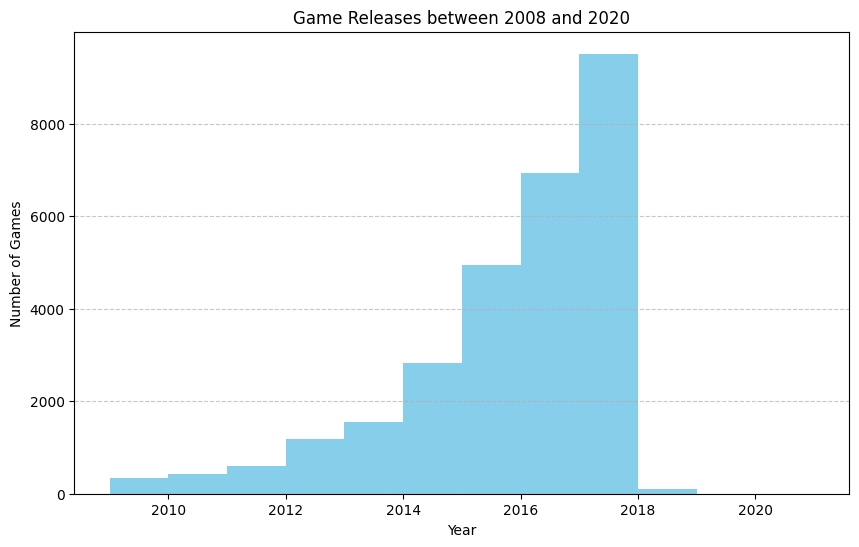

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame of recent games is named 'recentgames'

# Increase the size of the plot
plt.figure(figsize=(10, 6))

# Adjust the number of bins and color of the histogram
plt.hist(recentgames['release_date'].dt.year, bins=12, color='skyblue')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set plot title and labels
plt.title('Game Releases between year 2008 and 2020')
plt.ylabel('Number of Games')
plt.xlabel('Year')

plt.show()


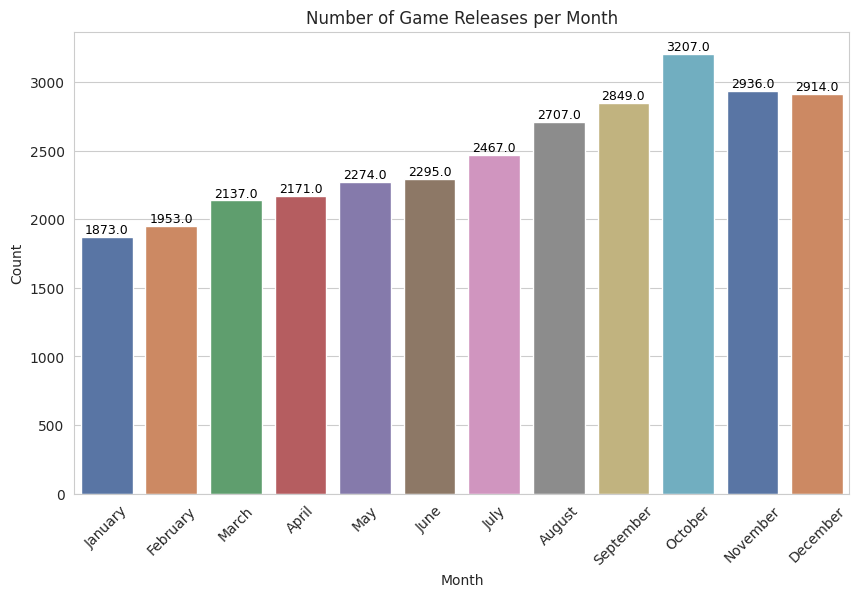

In [42]:
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame of game data is named 'data'

# Convert the month numbers to month names
data['release_month'] = data['release_date'].dt.month.apply(lambda x: calendar.month_name[x])

# Define the order of the month names
month_order = [calendar.month_name[i] for i in range(1, 13)]

# Increase the size of the plot
plt.figure(figsize=(10, 6))

# Use a different color palette
custom_palette = sns.color_palette("deep", 12)

# Create the countplot with the updated palette and order
with sns.axes_style("whitegrid"):
    sns.countplot(x=data['release_month'], palette=custom_palette, data=data, order=month_order)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.title('Number of Game Releases per Month')
plt.xlabel('Month')
plt.ylabel('Count')

plt.show()


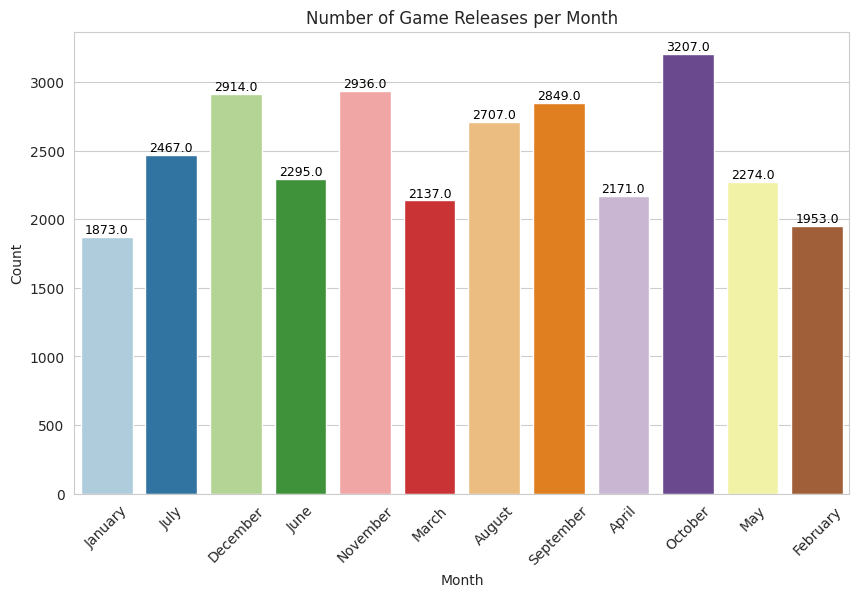

In [38]:
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame of game data is named 'data'

# Convert the month numbers to month names
data['release_month'] = data['release_date'].dt.month.apply(lambda x: calendar.month_name[x])

# Increase the size of the plot
plt.figure(figsize=(10, 6))

# Use a different color palette
custom_palette = sns.color_palette("Paired", 12)

# Create the countplot with the updated palette
with sns.axes_style("whitegrid"):
    sns.countplot(x=data['release_month'], palette=custom_palette, data=data)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.title('Number of Game Releases per Month')
plt.xlabel('Month')
plt.ylabel('Count')

plt.show()


In [8]:
from tabulate import tabulate

# Calculate the total number of games, users, publishers, genres, and developers
total_games = df_final['id'].nunique()
total_users = df_final['uid'].nunique()
total_publishers = df_final['publisher'].nunique()
total_genres = df_final['genres'].nunique()
total_developers = df_final['developer'].nunique()

# Create a list of lists to represent the data in tabular format
data = [
    ['Total Games', total_games],
    ['Total Users', total_users],
    ['Total Publishers', total_publishers],
    ['Total Genres', total_genres],
    ['Total Developers', total_developers]
]

# Print the data in tabular format using tabulate
print(tabulate(data, headers=["Category", "Count"], tablefmt="grid"))


+------------------+---------+
| Category         |   Count |
+==================+=========+
| Total Games      |    7677 |
+------------------+---------+
| Total Users      |   69277 |
+------------------+---------+
| Total Publishers |    3522 |
+------------------+---------+
| Total Genres     |     569 |
+------------------+---------+
| Total Developers |    4955 |
+------------------+---------+


**SVD**

In [9]:
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

In [10]:
df.rename(columns = {'uid':'user_id', 'id':'game_id'}, inplace = True)

In [11]:
df = df.drop(['Unnamed: 0'],axis=1)

In [7]:
df

,user_id,game_id,owned,genres,title,specs,rating
0,0,10,1.0,['Action'],Counter-Strike,"['Multi-player', 'Valve Anti-Cheat enabled']",5
1,1,10,1.0,['Action'],Counter-Strike,"['Multi-player', 'Valve Anti-Cheat enabled']",5
2,3,10,1.0,['Action'],Counter-Strike,"['Multi-player', 'Valve Anti-Cheat enabled']",5
3,4,10,1.0,['Action'],Counter-Strike,"['Multi-player', 'Valve Anti-Cheat enabled']",5
4,10,10,1.0,['Action'],Counter-Strike,"['Multi-player', 'Valve Anti-Cheat enabled']",5
...,...,...,...,...,...,...,...
4197322,55137,433400,1.0,"['Adventure', 'Indie', 'RPG']",Kim,"['Single-player', 'Steam Achievements', 'Steam...",3
4197323,58395,456780,1.0,"['Racing', 'Simulation', 'Sports']",DUCATI - 90th Anniversary,"['Single-player', 'Multi-player', 'Steam Achie...",2
4197324,67381,444770,1.0,"['Adventure', 'Indie']",Mimpi Dreams,"['Single-player', 'Steam Achievements', 'Full ...",4
4197325,74089,375450,1.0,['Strategy'],NOBUNAGA'S AMBITION: Sphere of Influence - Asc...,"['Single-player', 'Steam Achievements', 'Steam...",2


In [21]:
from surprise.model_selection import cross_validate, train_test_split
from surprise import Dataset, Reader, SVD

# Create a Reader object to parse the data in the required format
reader = Reader(rating_scale=(1, 5))

# Load the DataFrame into the Surprise Dataset format
data = Dataset.load_from_df(df[['user_id', 'game_id', 'rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.25)

# Use SVD algorithm for collaborative filtering
algo = SVD(n_epochs = 10, lr_all=0.01)

result_SVD_3 = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
# Train the algorithm on the training set
#trainset_full = data.build_full_trainset()
#algo.fit(trainset_full)

# Generate predictions on the test set
#predictions = algo.test(testset)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.0780  0.0785  0.0784  0.0790  0.0788  0.0785  0.0003  
MAE (testset)     0.0490  0.0491  0.0490  0.0490  0.0488  0.0490  0.0001  
Fit time          25.74   27.93   28.16   27.71   30.06   27.92   1.37    
Test time         6.87    10.00   10.04   6.90    10.81   8.92    1.69    


In [16]:
algo_1 = SVD(n_epochs = 5, lr_all=0.01, reg_all = 0.02, verbose = True)
# Perform cross-validation on the training set
result_SVD_1 = cross_validate(algo_1, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.1015  0.1005  0.1013  0.1013  0.1014  0.1012  0.0004  
MAE (testset)     0.0638  0.0635  0.0636  0.0634  0.0637  0.0636  0.0001  
Fit time          14.41   15.20   16.02   14.97   14.82   15.09   0.53    
Test time         12.42   7.92    9.18    9.31    6.71    9.11    1.91    


In [17]:
algo_2 = SVD(n_epochs = 10, lr_all=0.1, reg_all = 0.2, verbose = True)
# Perform cross-validation on the training set
result_SVD_2 = cross_validate(algo_2, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Evaluating RMSE, MAE of algorithm SVD on 5 split(s

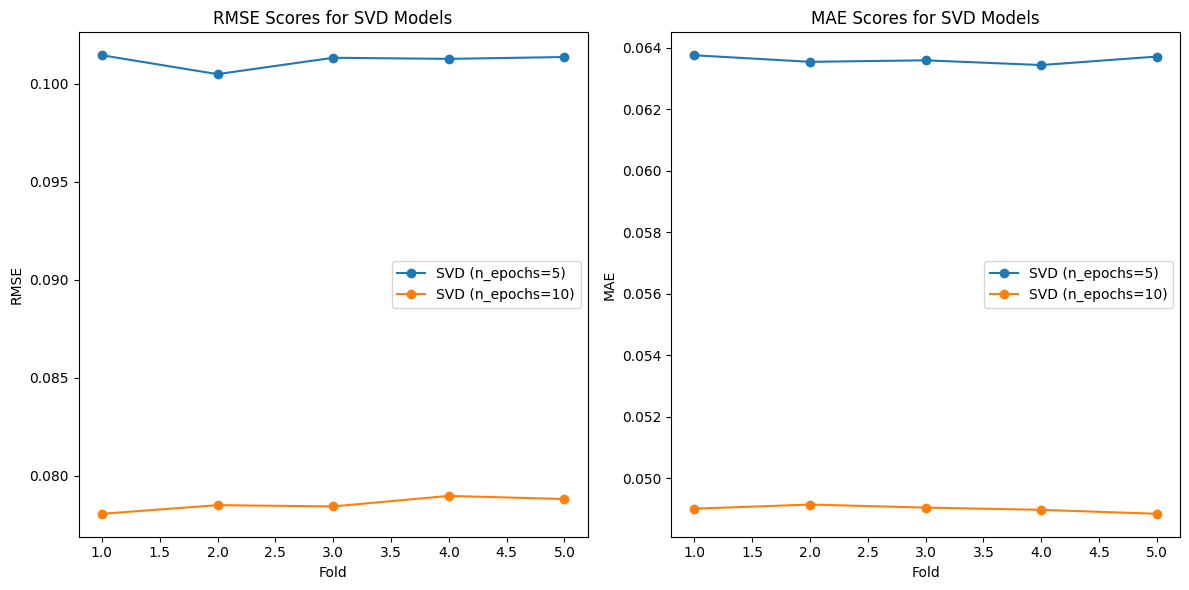

In [22]:
import matplotlib.pyplot as plt

# Extract RMSE and MAE scores from the results
rmse_scores_1 = result_SVD_1['test_rmse']
mae_scores_1 = result_SVD_1['test_mae']

rmse_scores_2 = result_SVD_3['test_rmse']
mae_scores_2 = result_SVD_3['test_mae']

# Create a range of folds for x-axis
folds = range(1, len(rmse_scores_1) + 1)

# Create subplots with RMSE and MAE side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot RMSE scores
ax1.plot(folds, rmse_scores_1, marker='o', label='SVD (n_epochs=5)')
ax1.plot(folds, rmse_scores_2, marker='o', label='SVD (n_epochs=10)')
ax1.set_xlabel('Fold')
ax1.set_ylabel('RMSE')
ax1.set_title('RMSE Scores for SVD Models')
ax1.legend()

# Plot MAE scores
ax2.plot(folds, mae_scores_1, marker='o', label='SVD (n_epochs=5)')
ax2.plot(folds, mae_scores_2, marker='o', label='SVD (n_epochs=10)')
ax2.set_xlabel('Fold')
ax2.set_ylabel('MAE')
ax2.set_title('MAE Scores for SVD Models')
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
from surprise import accuracy
# Evaluate the accuracy of the model
svd_rmse = accuracy.rmse(predictions)

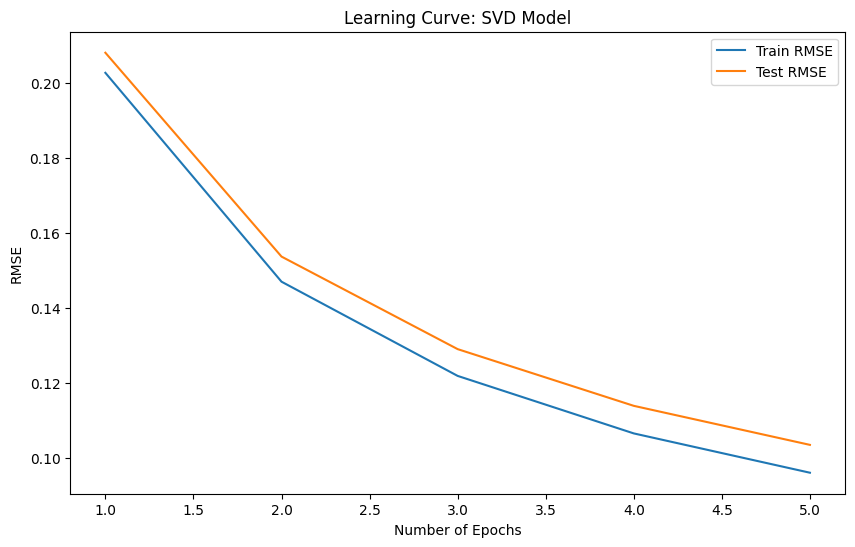

In [25]:
# Define a range of epochs for the learning curve
epochs_range = np.arange(1, 6)
train_rmse = []
test_rmse = []

# Train the algorithm for different numbers of epochs and record RMSE
for num_epochs in epochs_range:
    algo = SVD(n_epochs=num_epochs, lr_all=0.01)
    algo.fit(trainset)
    
    train_predictions = algo.test(trainset.build_testset())
    train_rmse.append(accuracy.rmse(train_predictions, verbose=False))
    
    test_predictions = algo.test(testset)
    test_rmse.append(accuracy.rmse(test_predictions, verbose=False))

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_rmse, label='Train RMSE')
plt.plot(epochs_range, test_rmse, label='Test RMSE')
plt.title('Learning Curve: SVD Model')
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

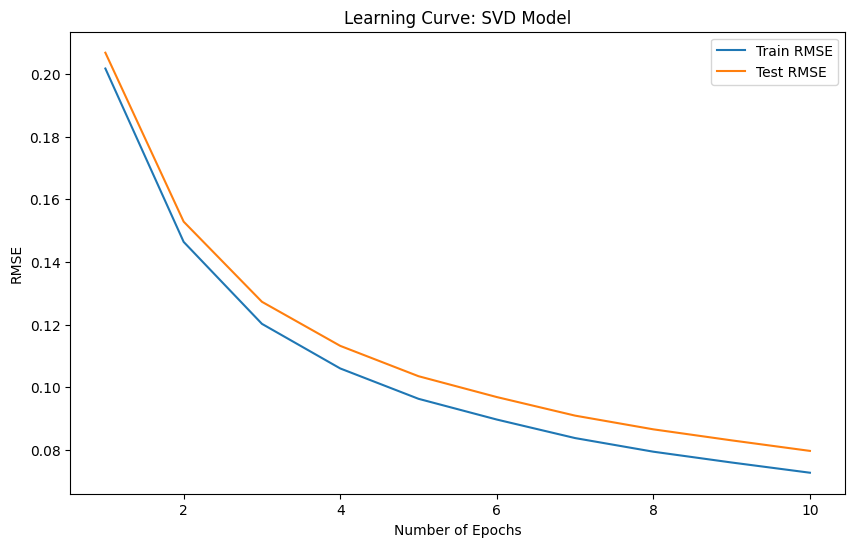

In [11]:
# Define a range of epochs for the learning curve
epochs_range = np.arange(1, 6)
train_rmse = []
test_rmse = []

# Train the algorithm for different numbers of epochs and record RMSE
for num_epochs in epochs_range:
    algo = SVD(n_epochs=num_epochs, lr_all=0.01)
    algo.fit(trainset)
    
    train_predictions = algo.test(trainset.build_testset())
    train_rmse.append(accuracy.rmse(train_predictions, verbose=False))
    
    test_predictions = algo.test(testset)
    test_rmse.append(accuracy.rmse(test_predictions, verbose=False))

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_rmse, label='Train RMSE')
plt.plot(epochs_range, test_rmse, label='Test RMSE')
plt.title('Learning Curve: SVD Model')
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [20]:
from collections import defaultdict

# Step 1: Replace 'user_id' with the actual user ID for whom you want to make recommendations
user_id = 1

# Step 2: Get the list of all game IDs that the user has not rated
all_game_ids = df['game_id'].unique()
user_rated_game_ids = df[df['user_id'] == user_id]['game_id'].unique()
unrated_game_ids = [game_id for game_id in all_game_ids if game_id not in user_rated_game_ids]

# Step 3: Predict ratings for the unrated games
predicted_ratings = defaultdict(float)  # Use defaultdict to store predicted ratings for unrated games
for game_id in unrated_game_ids:
    prediction = algo.predict(user_id, game_id)
    predicted_ratings[game_id] = prediction.est

# Create a list of dictionaries to store the results
recommendations_list = []

# Step 4: Sort and store the top 5 recommendations along with original and predicted ratings
for game_id, predicted_rating in sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)[:10]:
    title = df[df['game_id'] == game_id]['title'].values[0]
    genre = df[df['game_id'] == game_id]['genres'].values[0]
    original_rating = user_ratings[user_ratings['game_id'] == game_id]['rating'].values[0] if game_id in user_rated_game_ids else "Not rated"
    recommendations_list.append({
        'Game ID': game_id,
        'Title': title,
        'Genre': genre,
        'Original Rating': original_rating,
        'Predicted Rating': predicted_rating
    })

# Create a DataFrame from the list of recommendations
recommendations_df = pd.DataFrame(recommendations_list)

# Display the DataFrame
recommendations_df


,Game ID,Title,Genre,Original Rating,Predicted Rating
0,285440,Crimzon Clover WORLD IGNITION,"['Action', 'Indie']",Not rated,5.000000
1,373390,Contradiction - Spot The Liar!,"['Adventure', 'RPG', 'Strategy']",Not rated,5.000000
2,316720,planetarian ~the reverie of a little planet~,['Casual'],Not rated,5.000000
3,322190,SteamWorld Heist,"['Action', 'Adventure', 'Indie', 'RPG', 'Strat...",Not rated,4.987908
4,13250,Unreal Gold,['Action'],Not rated,4.987515
5,413420,Danganronpa 2: Goodbye Despair,['Adventure'],Not rated,4.983036
6,250050,Life Goes On: Done to Death,"['Action', 'Adventure', 'Casual', 'Indie']",Not rated,4.982937
7,411830,SENRAN KAGURA SHINOVI VERSUS,['Action'],Not rated,4.979972
8,368340,CrossCode,"['RPG', 'Early Access']",Not rated,4.971272
9,70400,Recettear: An Item Shop's Tale,"['RPG', 'Indie']",Not rated,4.968750


**NCF**

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Concatenate, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Load data (Replace this with your data loading code)
# df = pd.read_csv('y.csv')

# Create a copy of the DataFrame to work with
modified_df = df.copy()

# Create user and item mappings
user_mapping = {user_id: i for i, user_id in enumerate(modified_df['user_id'].unique())}
item_mapping = {game_id: i for i, game_id in enumerate(modified_df['game_id'].unique())}

# Map user and item IDs to integers
modified_df['user_id'] = modified_df['user_id'].map(user_mapping)
modified_df['game_id'] = modified_df['game_id'].map(item_mapping)

# Number of users and items
num_users = len(user_mapping)
num_items = len(item_mapping)


# Split data into train and test sets (Replace this with your train-test splitting logic)
# Shuffle the data before splitting
shuffled_df = modified_df.sample(frac=1).reset_index(drop=True)

# Split data into train, validation, and test sets
train_size = int(0.8 * len(shuffled_df))
validation_size = int(0.2 * len(shuffled_df))

train_df = shuffled_df[:train_size]
validation_df = shuffled_df[train_size : train_size + validation_size]
test_df = shuffled_df[train_size + validation_size:]



In [13]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization

def create_ncf_model(num_users, num_items, latent_dim=32, dropout_rate=0.2):
    user_input = Input(shape=(1,))
    item_input = Input(shape=(1,))

    user_embedding = Embedding(input_dim=num_users, output_dim=latent_dim)(user_input)
    item_embedding = Embedding(input_dim=num_items, output_dim=latent_dim)(item_input)

    user_flatten = Flatten()(user_embedding)
    item_flatten = Flatten()(item_embedding)

    concat = Concatenate()([user_flatten, item_flatten])

    dense1 = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(concat)
   
    dense2 = Dense(32, activation='relu',kernel_regularizer=l2(0.001))(dense1)
   
    dense3 = Dense(18, activation='relu',kernel_regularizer=l2(0.001))(dense2)
  

    output = Dense(1)(dense3)

    model = Model(inputs=[user_input, item_input], outputs=output)
    return model

# Create and compile NCF model

ncf_model = create_ncf_model(num_users, num_items)
ncf_model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
import matplotlib.pyplot as plt

# Train the model and store training history
history = ncf_model.fit(
    [train_df['user_id'], train_df['game_id']],
    train_df['rating'],
    batch_size=256,
    epochs=10,
    validation_data=([validation_df['user_id'], validation_df['game_id']], validation_df['rating']),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True)]
)

Epoch 1/10
9838/9838 [==============================] - 106s 11ms/step - loss: 0.0964 - val_loss: 0.0051
Epoch 2/10
9838/9838 [==============================] - 105s 11ms/step - loss: 0.0034 - val_loss: 0.0027
Epoch 3/10
9838/9838 [==============================] - 106s 11ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 4/10
9838/9838 [==============================] - 108s 11ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 5/10
9838/9838 [==============================] - 106s 11ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/10
9838/9838 [==============================] - 106s 11ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/10
9838/9838 [==============================] - 112s 11ms/step - loss: 9.6834e-04 - val_loss: 0.0010
Epoch 8/10
9838/9838 [==============================] - 105s 11ms/step - loss: 8.7439e-04 - val_loss: 9.0396e-04
Epoch 9/10
9838/9838 [==============================] - 105s 11ms/step - loss: 8.0208e-04 - val_loss: 8.4021e-04
Epoch 10/10
9838/9838 [============

In [2]:
# Training and validation loss values
training_losses = [0.0964, 0.0034, 0.0021, 0.0016, 0.0013, 0.0011, 9.6834e-04, 8.7439e-04, 8.0208e-04, 7.3881e-04]
validation_losses = [0.0051, 0.0027, 0.0018, 0.0015, 0.0012, 0.0011, 0.0010, 9.0396e-04, 8.4021e-04, 0.001]

# Calculate average losses
avg_training_loss = sum(training_losses) / len(training_losses)
avg_validation_loss = sum(validation_losses) / len(validation_losses)

print("Average Training Loss:", avg_training_loss)
print("Average Validation Loss:", avg_validation_loss)


Average Training Loss: 0.010928362
Average Validation Loss: 0.001714417


In [24]:
# Train the model and store training history
history_1 = ncf_model.fit(
    [train_df['user_id'], train_df['game_id']],
    train_df['rating'],
    batch_size=256,
    epochs=5,
    validation_data=([validation_df['user_id'], validation_df['game_id']], validation_df['rating']),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
)

Epoch 1/5
13117/13117 [==============================] - 182s 14ms/step - loss: 0.0593 - val_loss: 0.0039
Epoch 2/5
13117/13117 [==============================] - 175s 13ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 3/5
13117/13117 [==============================] - 171s 13ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 4/5
13117/13117 [==============================] - 183s 14ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 5/5
13117/13117 [==============================] - 181s 14ms/step - loss: 0.0011 - val_loss: 0.0012


In [3]:
# Training and validation loss values
training_losses = [0.0593, 0.0027, 0.0017, 0.0013, 0.0011]
validation_losses = [0.0039, 0.0020, 0.0015, 0.0013, 0.0012]

# Calculate average losses
avg_training_loss = sum(training_losses) / len(training_losses)
avg_validation_loss = sum(validation_losses) / len(validation_losses)

print("Average Training Loss:", avg_training_loss)
print("Average Validation Loss:", avg_validation_loss)


Average Training Loss: 0.013219999999999999
Average Validation Loss: 0.00198


In [14]:
# Train the model and store training history
history_2 = ncf_model.fit(
    [train_df['user_id'], train_df['game_id']],
    train_df['rating'],
    batch_size=128,
    epochs=10,
    validation_data=([validation_df['user_id'], validation_df['game_id']], validation_df['rating']),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
)

Epoch 1/10
26234/26234 [==============================] - 302s 11ms/step - loss: 0.0367 - val_loss: 0.0027
Epoch 2/10
26234/26234 [==============================] - 277s 11ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 3/10
26234/26234 [==============================] - 276s 11ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/10
26234/26234 [==============================] - 288s 11ms/step - loss: 0.0010 - val_loss: 9.4218e-04
Epoch 5/10
26234/26234 [==============================] - 281s 11ms/step - loss: 8.2700e-04 - val_loss: 0.0013
Epoch 6/10
26234/26234 [==============================] - 281s 11ms/step - loss: 7.0354e-04 - val_loss: 0.0010
Epoch 7/10
26234/26234 [==============================] - 282s 11ms/step - loss: 6.1650e-04 - val_loss: 9.4019e-04
Epoch 8/10
26234/26234 [==============================] - 281s 11ms/step - loss: 5.5075e-04 - val_loss: 5.8924e-04
Epoch 9/10
26234/26234 [==============================] - 282s 11ms/step - loss: 4.9831e-04 - val_loss: 5.5594e-04
E

In [1]:
# Training and validation loss values
training_losses = [0.0347, 0.0021, 0.0014, 0.0010, 8.5945e-04, 7.3718e-04, 6.4442e-04, 5.7528e-04, 5.2335e-04, 4.8278e-04]
validation_losses = [0.0031, 0.0017, 0.0013, 0.0010, 9.0458e-04, 7.8369e-04, 7.5682e-04, 7.9043e-04, 6.1312e-04, 5.4164e-04]

# Calculate average losses
avg_training_loss = sum(training_losses) / len(training_losses)
avg_validation_loss = sum(validation_losses) / len(validation_losses)

print("Average Training Loss:", avg_training_loss)
print("Average Validation Loss:", avg_validation_loss)


Average Training Loss: 0.004302245999999999
Average Validation Loss: 0.0011490279999999999


In [39]:
# Train the model and store training history
history_3 = ncf_model.fit(
    [train_df['user_id'], train_df['game_id']],
    train_df['rating'],
    batch_size=128,
    epochs=5,
    validation_data=([validation_df['user_id'], validation_df['game_id']], validation_df['rating']),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True)]
)

Epoch 1/5
26234/26234 [==============================] - 263s 10ms/step - loss: 0.0352 - val_loss: 0.0028
Epoch 2/5
26234/26234 [==============================] - 262s 10ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 3/5
26234/26234 [==============================] - 259s 10ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/5
26234/26234 [==============================] - 255s 10ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 5/5
26234/26234 [==============================] - 289s 11ms/step - loss: 8.3572e-04 - val_loss: 0.0013


In [4]:
# Training and validation loss values
training_losses = [0.0352, 0.0020, 0.0013, 0.0010, 8.3572e-04]
validation_losses = [0.0028, 0.0016, 0.0012, 0.0010, 0.001]

# Calculate average losses
avg_training_loss = sum(training_losses) / len(training_losses)
avg_validation_loss = sum(validation_losses) / len(validation_losses)

print("Average Training Loss:", avg_training_loss)
print("Average Validation Loss:", avg_validation_loss)


Average Training Loss: 0.008067144000000002
Average Validation Loss: 0.00152


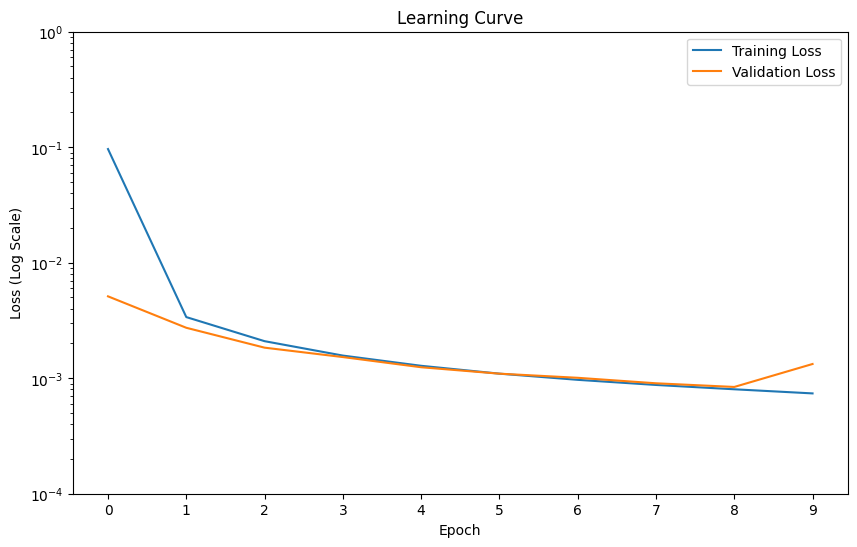

In [84]:
# Define custom ranges for the x and y axes
x_ticks = np.arange(0, len(history.history['loss']))  # Tick marks for every epoch

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log Scale)')
plt.yscale('log')  # Set y-axis to logarithmic scale

# Set the custom x-axis tick marks
plt.xticks(x_ticks)

# Define custom range for the y-axis (example values, adjust as needed)
plt.ylim(1e-4, 1e-0)

plt.legend()
plt.show()


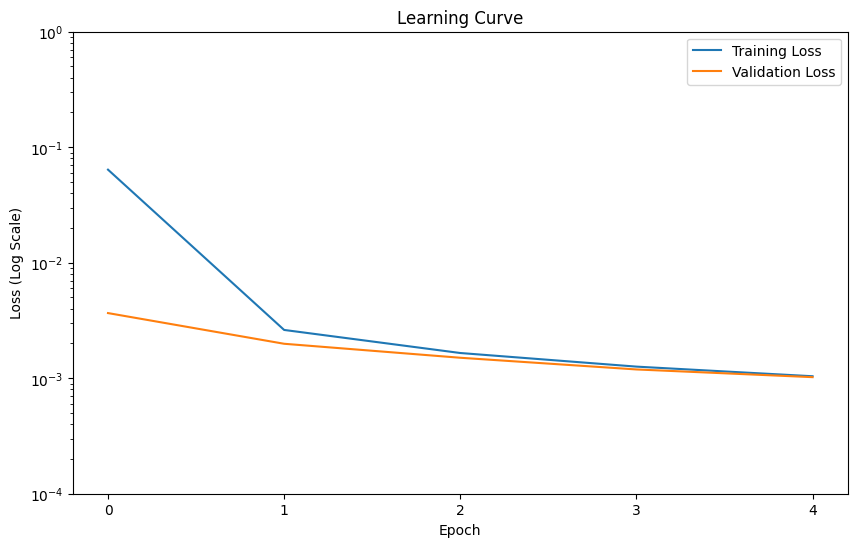

In [83]:
# Define custom ranges for the x and y axes
x_ticks = np.arange(0, len(history_1.history['loss']))  # Tick marks for every epoch

plt.figure(figsize=(10, 6))
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log Scale)')
plt.yscale('log')  # Set y-axis to logarithmic scale

# Set the custom x-axis tick marks
plt.xticks(x_ticks)

# Define custom range for the y-axis (example values, adjust as needed)
plt.ylim(1e-4, 1e-0)

plt.legend()
plt.show()

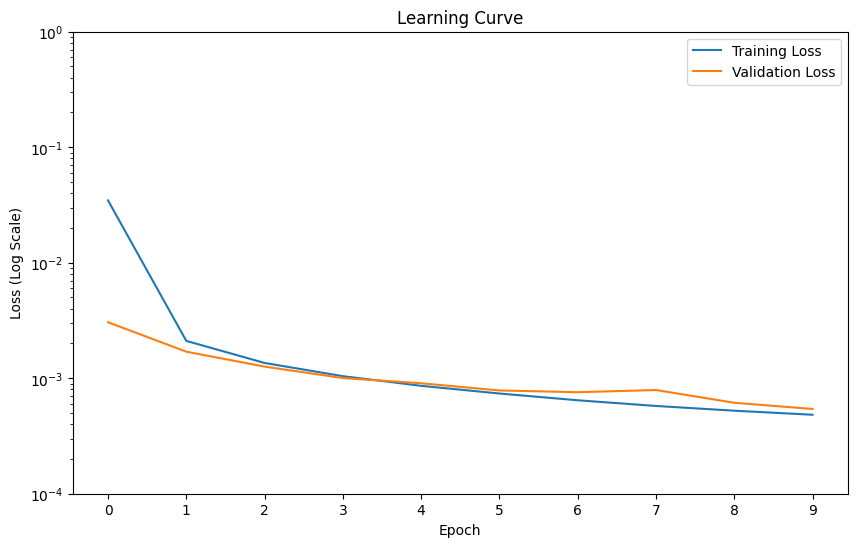

In [85]:
# Define custom ranges for the x and y axes
x_ticks = np.arange(0, len(history_2.history['loss']))  # Tick marks for every epoch

plt.figure(figsize=(10, 6))
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log Scale)')
plt.yscale('log')  # Set y-axis to logarithmic scale

# Set the custom x-axis tick marks
plt.xticks(x_ticks)

# Define custom range for the y-axis (example values, adjust as needed)
plt.ylim(1e-4, 1e-0)

plt.legend()
plt.show()

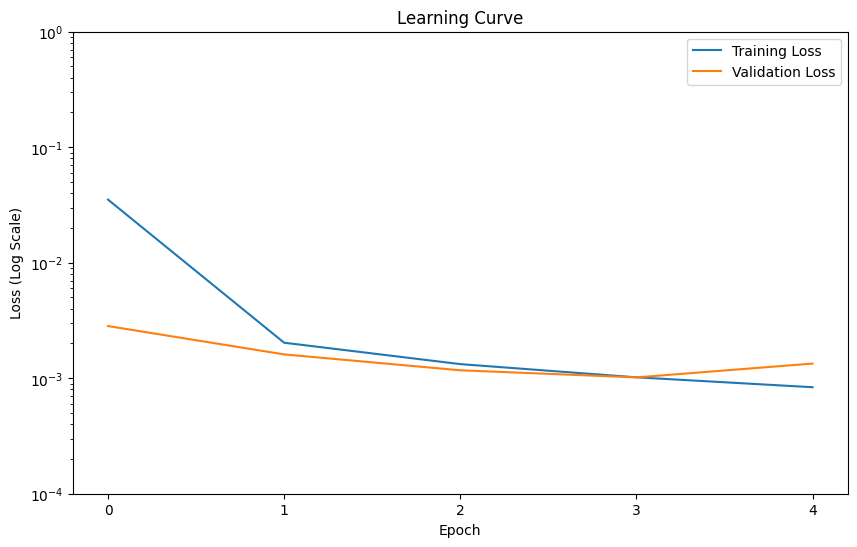

In [86]:
# Define custom ranges for the x and y axes
x_ticks = np.arange(0, len(history_3.history['loss']))  # Tick marks for every epoch

plt.figure(figsize=(10, 6))
plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log Scale)')
plt.yscale('log')  # Set y-axis to logarithmic scale

# Set the custom x-axis tick marks
plt.xticks(x_ticks)

# Define custom range for the y-axis (example values, adjust as needed)
plt.ylim(1e-4, 1e-0)

plt.legend()
plt.show()

In [72]:
# Calculate RMSE and MAE for the test set
from sklearn.metrics import mean_squared_error, mean_absolute_error

test_predictions = ncf_model.predict([test_df['user_id'], test_df['game_id']])
test_rmse = np.sqrt(mean_squared_error(test_df['rating'], test_predictions))
test_mae = mean_absolute_error(test_df['rating'], test_predictions)

print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)

1/1 [==============================] - 0s 60ms/step
Test RMSE: 0.012519598007202148
Test MAE: 0.012519598007202148


1/1 [==============================] - 0s 23ms/step
Test RMSE: 7.570474940621352e-05
Test MAE: 0.008700847625732422


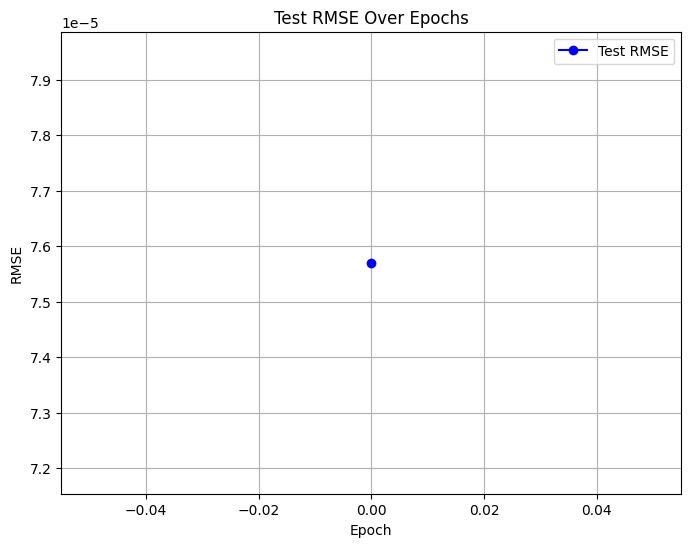

In [16]:
import matplotlib.pyplot as plt

# Calculate RMSE and MAE for the test set
from sklearn.metrics import mean_squared_error, mean_absolute_error

test_predictions = ncf_model.predict([test_df['user_id'], test_df['game_id']])
test_rmse = mean_squared_error(test_df['rating'], test_predictions)
test_mae = mean_absolute_error(test_df['rating'], test_predictions)

print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)

# Plot the Test RMSE
plt.figure(figsize=(8, 6))
plt.plot(test_rmse, marker='o', color='blue', label='Test RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Test RMSE Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# Step 1: Preprocess the User ID
user_id_to_predict = user_mapping[1]  # Replace 'your_user_id' with the actual user ID

# Step 2: Generate Recommendations
item_indices = np.arange(num_items)  # Array of item indices
user_indices = np.full_like(item_indices, user_id_to_predict)  # Replicate the user index for all items
predicted_ratings = ncf_model.predict([user_indices, item_indices])

# Clip the predicted ratings to the range [0, 5]
predicted_ratings = np.clip(predicted_ratings, 0, 5)


# Step 3: Select Top 10 Games
top_10_indices = predicted_ratings.argsort(axis=0)[-10:][::-1]  # Indices of top 10 games
top_10_game_ids = [game_id for game_id, _ in item_mapping.items() if _ in top_10_indices]

print("Top 10 game IDs:", top_10_game_ids)
print("Unique game IDs in df:", df['game_id'].unique())

# Create a list to store the top 10 recommended games' information
top_10_games_info = []

for game_id in top_10_game_ids:
    if game_id in df['game_id'].unique():
        game_info = df[df['game_id'] == game_id].iloc[0]
        title = game_info['title']
        genre = game_info['genres']
        predicted_rating = predicted_ratings[item_mapping[game_id]][0]
        top_10_games_info.append({'Game ID': game_id, 'Title': title, 'Genre': genre, 'Predicted Rating': predicted_rating})
    else:
        print(f"Game ID {game_id} not found in df DataFrame.")

# Create a DataFrame from the list of top 10 game information
top_10_games_df = pd.DataFrame(top_10_games_info)

print("Top 10 recommended games:")
top_10_games_df


240/240 [==============================] - 1s 2ms/step
Top 10 game IDs: [10, 260230, 261030, 261570, 280220, 331470, 374570, 13240, 13230, 245170]
Unique game IDs in df: [    10     20     30 ... 444770 375450 433920]
Top 10 recommended games:


,Game ID,Title,Genre,Predicted Rating
0,10,Counter-Strike,['Action'],5.0
1,260230,Valiant Hearts: The Great War™ / Soldats Incon...,['Adventure'],5.0
2,261030,The Walking Dead: Season 2,['Adventure'],5.0
3,261570,Ori and the Blind Forest,['Action'],5.0
4,280220,Creeper World 3: Arc Eternal,"['Indie', 'Simulation', 'Strategy']",5.0
5,331470,Everlasting Summer,"['Adventure', 'Casual', 'Free to Play', 'Indie']",5.0
6,374570,Kung Fury,NaN,5.0
7,13240,Unreal Tournament: Game of the Year Edition,['Action'],5.0
8,13230,Unreal Tournament 2004: Editor's Choice Edition,['Action'],5.0
9,245170,Skullgirls,"['Action', 'Indie']",5.0


In [17]:
# Step 1: Preprocess the User ID
user_id_to_predict = user_mapping[22]  # Replace 'your_user_id' with the actual user ID

# Get the games that the chosen user has already rated
user_rated_game_ids = df[df['user_id'] == user_id_to_predict]['game_id'].unique()

# Step 2: Generate Recommendations
item_indices = np.array([item_idx for item_idx in range(num_items) if item_idx not in user_rated_game_ids])
user_indices = np.full_like(item_indices, user_id_to_predict)  # Replicate the user index for selected items
predicted_ratings = ncf_model.predict([user_indices, item_indices])

# Clip the predicted ratings to the range [0, 5]
predicted_ratings = np.clip(predicted_ratings, 0, 5)

# Step 3: Select Top 10 Games
top_10_indices = predicted_ratings.argsort(axis=0)[-10:][::-1]  # Indices of top 10 games
top_10_game_ids = [item_indices[item_idx] for item_idx in top_10_indices]

print("Top 10 game IDs:", top_10_game_ids)
print("Unique game IDs in df:", df['game_id'].unique())

# Create a list to store the top 10 recommended games' information
top_10_games_info = []

for game_id in top_10_game_ids:
    if game_id in df['game_id'].unique():
        game_info = df[df['game_id'] == game_id].iloc[0]
        title = game_info['title']
        genre = game_info['genres']
        predicted_rating = predicted_ratings[top_10_indices == item_mapping[game_id]][0]
        top_10_games_info.append({'Game ID': game_id, 'Title': title, 'Genre': genre, 'Predicted Rating': predicted_rating})
    else:
        print(f"Game ID {game_id} not found in df DataFrame.")

# Create a DataFrame from the list of top 10 game information
top_10_games_df = pd.DataFrame(top_10_games_info)

239/239 [==============================] - 0s 1ms/step
Top 10 game IDs: [array([0]), array([209]), array([2279]), array([1184]), array([1185]), array([2250]), array([2249]), array([2246]), array([202]), array([2240])]
Unique game IDs in df: [    10     20     30 ... 444770 375450 433920]
Game ID [0] not found in df DataFrame.
Game ID [209] not found in df DataFrame.
Game ID [2279] not found in df DataFrame.
Game ID [1184] not found in df DataFrame.
Game ID [1185] not found in df DataFrame.
Game ID [2250] not found in df DataFrame.
Game ID [2249] not found in df DataFrame.
Game ID [2246] not found in df DataFrame.
Game ID [202] not found in df DataFrame.
Game ID [2240] not found in df DataFrame.
Top 10 recommended games:


""


In [30]:
top_10_games_df

,Game ID,Title,Genre,Original Rating,Predicted Rating
0,10,Counter-Strike,['Action'],Not Rated,5.000000
1,260230,Valiant Hearts: The Great War™ / Soldats Incon...,['Adventure'],Not Rated,4.993598
2,261030,The Walking Dead: Season 2,['Adventure'],Not Rated,4.990521
3,261570,Ori and the Blind Forest,['Action'],Not Rated,4.987030
4,280220,Creeper World 3: Arc Eternal,"['Indie', 'Simulation', 'Strategy']",Not Rated,4.983040
5,331470,Everlasting Summer,"['Adventure', 'Casual', 'Free to Play', 'Indie']",Not Rated,4.980342
6,374570,Kung Fury,NaN,Not Rated,4.979933
7,13240,Unreal Tournament: Game of the Year Edition,['Action'],Not Rated,4.977120
8,13230,Unreal Tournament 2004: Editor's Choice Edition,['Action'],Not Rated,4.973420
9,245170,Skullgirls,"['Action', 'Indie']",Not Rated,4.968434
